# Exercícios 1 a 3

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\dell\Documents\Insper\2º Semestre\Ciência dos Dados\Mini Projeto


In [2]:
dados = pd.read_csv("Civil_List.csv")

In [3]:
dados.head()

,﻿CALENDAR_YEAR,DPT,NAME,ADDRESS,TTL,PC,SAL_RATE
0,2014,868,B J SANDIFORD,DEPARTMENT OF CITYWIDE ADM,12702,X,5.0
1,2014,868,C A WIGFALL,DEPARTMENT OF CITYWIDE ADM,12702,X,5.0
2,2014,69,A E A-AWOSOGBA,HRA/DEPARTMENT OF SOCIAL S,52311,A,51955.0
3,2014,868,K D AABY,DEPARTMENT OF CITYWIDE ADM,10209,X,12.0
4,2014,56,I D AADIL,POLICE DEPARTMENT,71012,A,46953.0


In [4]:
dados_2015 = dados[269848:]
dados_2015_SAL = dados_2015.SAL_RATE

# Exercício 4

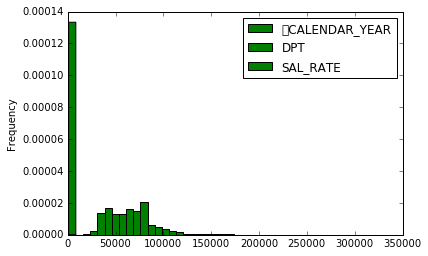

In [5]:
faixa = np.arange(1000, 350000, 7500)
dados.plot(kind = 'hist', bins = faixa, normed= 1, color='green')

### *Contínuo Normal*,  Continuo Log-Normal, *Gama*  ou Continuo Extremo

# Exercício 5

### Estimando os parâmetros para a Normal

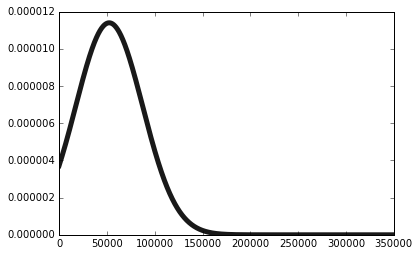

In [6]:
x = pd.Series(data=sorted(dados_2015_SAL))
plt.plot(x, stats.norm.pdf(x, loc=dados_2015_SAL.mean(),scale=dados_2015_SAL.std()),
    'r-', lw=5, alpha=0.9, label='norm pdf', color = 'black')
#dados_2015_SAL.plot(kind = 'hist', bins = faixa, normed= 1, color='green')
plt.show()

##### Média = 52384.61622473371, Dispersão = 35002.86726015095

### Estimando os parâmetros para a Gamma

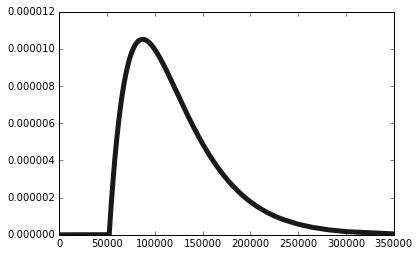

In [7]:
k = 2
x = pd.Series(data=sorted(dados_2015_SAL))
plt.plot(x, stats.gamma.pdf(x, k, loc=dados_2015_SAL.mean(),scale=dados_2015_SAL.std()),
    'r-', lw=5, alpha=0.9, label='norm pdf', color = 'black')
#dados_2015_SAL.plot(kind = 'hist', bins = faixa, normed= 1, color='green')
plt.show()

##### Média = 52384.61622473371, Dispersão = 35002.86726015095, K = 1.5

## Exercício 6

### FIT para a distribuição Normal

In [8]:
stats.norm.fit(dados_2015_SAL)

(52384.616224725025, 35002.809046757357)

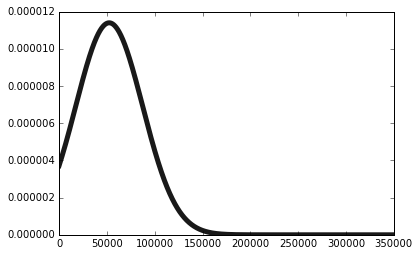

In [9]:
x = pd.Series(data=sorted(dados_2015_SAL))
plt.plot(x, stats.norm.pdf(x,loc=52384.616224725025,scale=35002.809046757357),
    'r-', lw=5, alpha=0.9, label='norm pdf', color = 'black')
#dados_2015_SAL.plot(kind = 'hist', bins = faixa, normed= 1, color='green')
plt.show()

### FIT para a distribuição Gamma

In [10]:
stats.gamma.fit(dados_2015_SAL)

(70.178502797519371, -241028.18633168074, 4180.9498571559579)

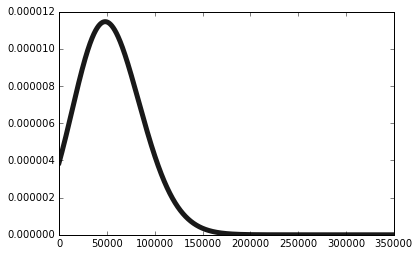

In [11]:
x = pd.Series(data=sorted(dados_2015_SAL))
plt.plot(x, stats.gamma.pdf(x,70.178502797519371,loc=-241028.18633168074,scale=4180.9498571559579),
    'r-', lw=5, alpha=0.9, label='norm pdf', color = 'black')
#dados_2015_SAL.plot(kind = 'hist', bins = faixa, normed= 1, color='green')
plt.show()

## Exercício 7

### Gráficos para a Normal

### Parâmetros Estimados:

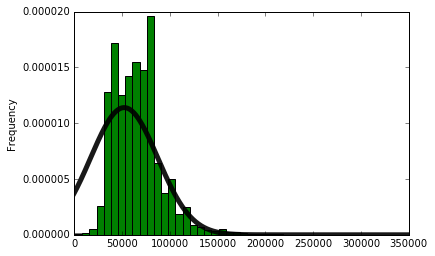

In [12]:
x = pd.Series(data=sorted(dados_2015_SAL))
plt.plot(x, stats.norm.pdf(x, loc=dados_2015_SAL.mean(),scale=dados_2015_SAL.std()),
    'r-', lw=5, alpha=0.9, label='norm pdf', color = 'black')
dados_2015_SAL.plot(kind = 'hist', bins = faixa, normed= 1, color='green')
plt.show()

### Parâmetros FIT

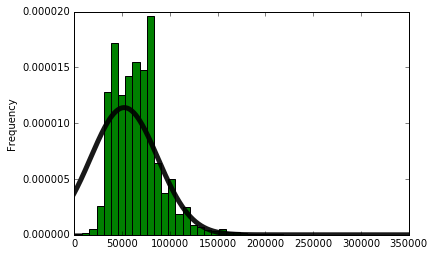

In [13]:
x = pd.Series(data=sorted(dados_2015_SAL))
plt.plot(x, stats.norm.pdf(x,loc=52384.616224725025,scale=35002.809046757357),
    'r-', lw=5, alpha=0.9, label='norm pdf', color = 'black')
dados_2015_SAL.plot(kind = 'hist', bins = faixa, normed= 1, color='green')
plt.show()

### Gráficos para a Gamma

### Parâmetros Estimados

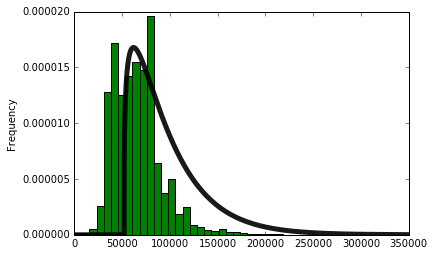

In [14]:
k = 1.28
x = pd.Series(data=sorted(dados_2015_SAL))
plt.plot(x, stats.gamma.pdf(x, k, loc=dados_2015_SAL.mean(),scale=dados_2015_SAL.std()),
    'r-', lw=5, alpha=0.9, label='norm pdf', color = 'black')
dados_2015_SAL.plot(kind = 'hist', bins = faixa, normed= 1, color='green')
plt.show()

### Parâmetros FIT

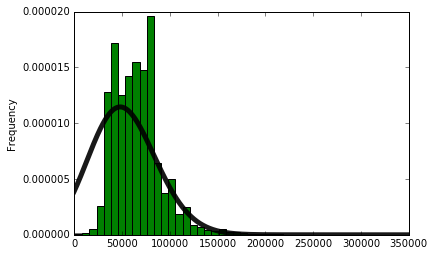

In [15]:
x = pd.Series(data=sorted(dados_2015_SAL))
plt.plot(x, stats.gamma.pdf(x,70.178502797519371,loc=-241028.18633168074,scale=4180.9498571559579),
    'r-', lw=5, alpha=0.9, label='norm pdf', color = 'black')
dados_2015_SAL.plot(kind = 'hist', bins = faixa, normed= 1, color='green')
plt.show()

## Exercício 8

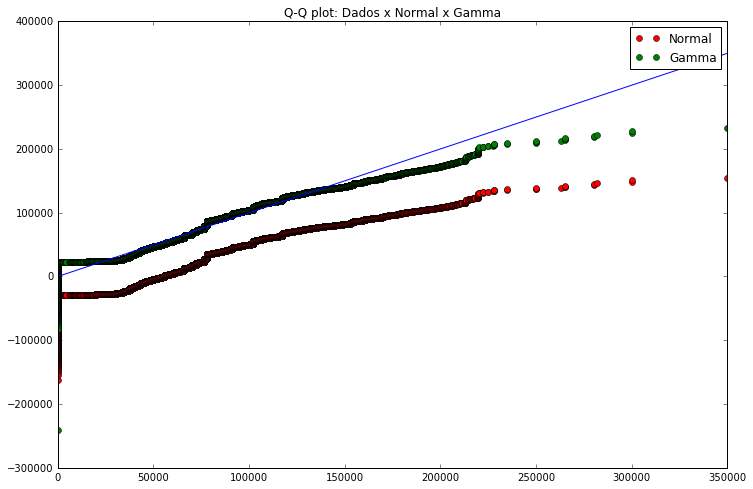

In [16]:
# dados ordenados e quantis teóricos - QQplot
dados = sorted(dados_2015_SAL)
# Calcula a frequência relativa acumulada com os dados vindos dos arquivos
fra = [] # frequencia relativa acumulada
for i in range(len(dados)):
    acc = (i - 0.5) / len(dados)
    if acc < 0:
        acc = 0
    fra.append(acc) # ver Magalhães e Lima (pag. 195)

# Convertemos fra em uma Series do Pandas
fra = pd.Series(data=fra)

# Gera os valores dos quantis teóricos para as distribuições analisadas
q_norm = stats.norm.ppf(fra, scale=35002.809046757357) # quantis teóricos da exponencial
q_gamma = stats.gamma.ppf(fra, scale=4180.9498571559579, loc=-241028.18633168074, a=70.178502797519371)


fig = plt.figure(figsize=(12,8))

plt.title("Q-Q plot: Dados x Normal x Gamma")

norm_plot, = plt.plot(dados, q_norm,"o",color="red", label="Normal")  
gamma_plot, = plt.plot(dados, q_gamma, 'o', color="green", label = "Gamma")

plt.legend(handles=[norm_plot, gamma_plot])
plt.plot((min(dados), max(dados)), (min(dados), max(dados)), '-')

## Exercício 9

[]

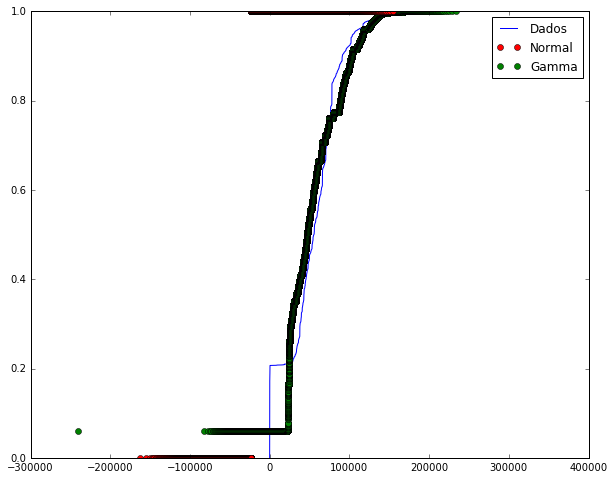

In [17]:
gamafit = stats.gamma.fit(dados_2015_SAL)
normfit = stats.norm.fit(dados_2015_SAL)
cdf_gamma = stats.gamma.cdf(dados,  gamafit[0], gamafit[1], gamafit[2])
cdf_norm = stats.alpha.cdf(dados, normfit[0], normfit[1])

fig = plt.figure(figsize=(10,8))

dados_plot, = plt.plot(dados, fra, "-", label="Dados")
gamma_plot, = plt.plot(q_gamma, cdf_gamma, 'o', label = "Gamma")
norm_plot, = plt.plot(q_norm, cdf_norm, 'o', label="Normal")
plt.legend(handles=[dados_plot,norm_plot, gamma_plot])

plt.plot()

## Exercício 10

In [18]:
erro_quadratico_norm = sum((dados - q_norm)**2)
erro_quadratico_gamma = sum((dados - q_gamma)**2)

print("Erro quadrático da normal :{:4.3f}\n".format(erro_quadratico_norm))
print("Erro quadrático da gamma :{:4.3f}\n".format(erro_quadratico_gamma))


Erro quadrático da normal : inf

Erro quadrático da gamma :20630673773934.266



In [19]:
eqm_norm = erro_quadratico_norm/len(dados)
eqm_gamma = erro_quadratico_gamma/len(dados)

print("Erro quadratico médio da normal :", eqm_norm)
print("Erro quadratico médio da gamma :", eqm_gamma)

Erro quadratico médio da normal : inf
Erro quadratico médio da gamma : 68621833.1175


In [20]:
soma_diferenças_norm = sum(abs(dados - q_norm))
soma_diferenças_gamma = sum(abs(dados - q_gamma))

print("Soma de diferenças da normal :", soma_diferenças_norm)
print("Soma de diferenças da gamma :", soma_diferenças_gamma)


Soma de diferenças da normal : inf
Soma de diferenças da gamma : 1867482116.24


In [21]:
# Diferenças absolutas
soma_difs_cdf_norm = sum( abs(fra - cdf_norm))
soma_difs_cdf_gamma = sum( abs(fra - cdf_gamma))

print("Erro da soma do módulo das diferenças da normal versus F.R.A: {0} \nErro da soma do módulo das diferenças da gamma versus F.R.A: {1}".format(soma_difs_cdf_norm, soma_difs_cdf_gamma))

Erro da soma do módulo das diferenças da normal versus F.R.A: 93524.26255725237 
Erro da soma do módulo das diferenças da gamma versus F.R.A: 12724.348010269112


In [24]:
# Kolmogorov-Smirnov goodness-of-fit test
ks_aderencia_norm = max(abs(fra-cdf_norm))
ks_aderencia_gamma = max(abs(fra-cdf_gamma))


print("Teste K-S para a normal com μ= {:4.2f}: {:4.3f}\n\
Teste K-S para a gamma com scale={:4.3f}, loc=0 e a={:4.3f}  {:4.3f}:".format(35002.809046757357, ks_aderencia_norm, 4180.9498571559579, gamafit[2], ks_aderencia_gamma))

Teste K-S para a normal com μ= 35002.81: 0.747
Teste K-S para a gamma com scale=4180.950, loc=0 e a=4180.950  0.145:


## Exercicio 11


|        Erro        |    Gamma   |   Normal    |
|--------------------|------------|-------------|
|     Quadrático     |  68621833  |     inf     |
|Diferenças Absolutas|    12724   |    93524    |
| Kolmogorov-Smirnov |    0.145   |    0.747    |

## Conclusão

##### Através da análise dos modelos probabilísticos que, teoricamente, funcionariam melhor para os dados analisados, é possível inferir que o modelo Gamma descreve melhor a disposição salarial da cidade de NY em 2015. Através de recursos como o Q-Q Plot e os cálculos de erros (exercício 10), é possível analisar e chegar a conclusões concretas não só para esse espaço amostral, mas também para outras bases de dados. 